# HOMEWORK 3: K-MEANS"
Full name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB 63

# Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1:
Implement k-means algorithm by Numpy.

In [159]:
class MyKMeans:
    def __init__(self, n_clusters=3, max_iter=None, n_ini=5):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers = None
        self.X = None
        self.labels = None
        self.n_init = n_ini
        self.variance = []
        self.n_init_result = []
    
    def fit(self, X):
        self.X = np.array(X)
        for n in range(self.n_init):
            labels, centers, variance = self._cluster(self.X)
            self.n_init_result.append([labels, centers])
            self.variance.append(variance)
        # self.n_init_result = np.array(self.n_init_result)
        best_result = np.argmin(self.variance)
        self.labels = self.n_init_result[best_result][0]
        self.cluster_centers = self.n_init_result[best_result][1]
    
    def _cluster(self, X):
        # indices = np.random.randint(0, self.X.shape[0]-1, size=3)
        indices = np.random.choice(self.X.shape[0], size=self.n_clusters, replace=False)
        centers = np.array([self.X[i] for i in indices])
        # centers = np.random.rand(3)
        labels = np.zeros(self.X.shape[0])
        new_labels = np.zeros(self.X.shape[0])
        for iter in range(self.max_iter):
            for x in range(self.X.shape[0]):
                distance = np.array([self._distance(self.X[x] - c) for c in centers])
                # print(distance)
                new_labels[x] = np.argmin(distance)
                # print(new_labels)
            if np.array_equal(labels, new_labels):
                break
            else:
                labels = new_labels.copy()
                centers = np.array([np.mean(self.X[labels==c]) for c in np.arange(0, self.n_clusters, 1)])   
        variance = np.array([np.var(self.X[labels==c]) for c in np.arange(0, self.n_clusters, 1)])
        variance = variance.sum()
        return labels, centers, variance       
    
    def predict(self, X):
        labels = []
        for x in X:
            distance = self._distance(X[x] - self.cluster_centers)
            labels.append(np.armin(distance))
        return np.array(labels)

    def _distance(self, X):
        return np.linalg.norm(X)

# Exercise 2

In [160]:
wine = pd.read_csv("../data/wine-clustering.csv")
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [180]:
from sklearn.cluster import KMeans
X = wine.iloc[:, 7:9]

kmeans = MyKMeans(n_clusters=3, max_iter=1000, n_ini=10)
kmeans.fit(X)
# kmeans = KMeans(n_clusters=3, max_iter=1000, n_init=10)
# kmeans.fit(X)
X.loc[:, 'labels'] = kmeans.labels

<Axes: xlabel='Nonflavanoid_Phenols', ylabel='Proanthocyanins'>

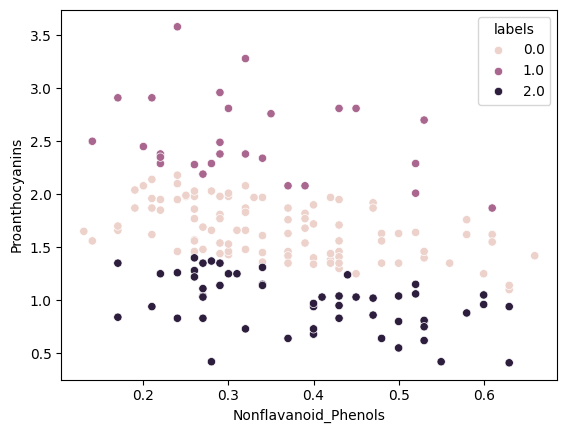

In [181]:
sns.scatterplot(X, x=X.columns[0], y=X.columns[1], hue='labels')